In [22]:
import pandas as pd

# Load datasets
transaction_data = pd.read_csv("Your data location.csv")
purchase_behaviour = pd.read_csv("/Your_Data_Location.csv")

# Identify Profitable Products
profit_per_product = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])  # Group by Product
    ["TOT_SALES"].sum()  # Sum total sales
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)  # Sort by total sales
)



#Top 5 Products

In [23]:

top_5_products = profit_per_product.head(5)
print("Top 5 Most Profitable Products:")
print(top_5_products)

Top 5 Most Profitable Products:
     PROD_NBR                                 PROD_NAME  TOT_SALES
3           4          Dorito Corn Chp     Supreme 380g    40352.0
13         14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15         16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
101       102    Kettle Mozzarella   Basil & Pesto 175g    34457.4
6           7         Smiths Crinkle      Original 330g    34302.6


#Merging Two Datasets

In [24]:
# Merge Transaction Data with Customer Segments
merged_data = transaction_data.merge(
    purchase_behaviour, on="LYLTY_CARD_NBR", how="left"
)

In [25]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [26]:
# Find number of unique labels/classes in LIFESTAGE column
num_lifestage_classes = purchase_behaviour["LIFESTAGE"].nunique()
print("Number of unique LIFESTAGE classes:", num_lifestage_classes)

Number of unique LIFESTAGE classes: 7


# Identify Most Loyal Customers based on their Life stage

In [27]:

loyal_customers = (
    merged_data.groupby("LIFESTAGE")  # Group by Customer Segment
    ["TOT_SALES"].sum()  # Sum total sales
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)  # Sort by spending
)



In [28]:

most_loyal_segment = loyal_customers.iloc[0]
print("Most Loyal Customer Segment:")
print(most_loyal_segment)


Most Loyal Customer Segment:
LIFESTAGE    OLDER SINGLES/COUPLES
TOT_SALES                402426.75
Name: 3, dtype: object


# Identify Most Loyal Customers based on their Premium Category

In [29]:

loyal_customers__ = (
    merged_data.groupby("PREMIUM_CUSTOMER")  # Group by Customer Segment
    ["TOT_SALES"].sum()  # Sum total sales
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)  # Sort by spending
)



In [30]:

most_loyal_segment = loyal_customers__.iloc[0]
print("Most Loyal Customer Segment:")
print(most_loyal_segment)


Most Loyal Customer Segment:
PREMIUM_CUSTOMER    Mainstream
TOT_SALES             750744.5
Name: 1, dtype: object


# Identify Most Loyal Customers based on their life stage and premium category together

In [31]:

loyal_customers_ = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])  # Group by LIFESTAGE & PREMIUM_CUSTOMER
    ["TOT_SALES"].sum()  # Sum total sales
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)  # Sort by spending
)

# Most Profitable Customer Segment
most_profitable_segment = loyal_customers_.iloc[0]
print("Most Profitable Customer Segment:")
print(most_profitable_segment)

Most Profitable Customer Segment:
LIFESTAGE           OLDER FAMILIES
PREMIUM_CUSTOMER            Budget
TOT_SALES                168363.25
Name: 6, dtype: object


# Category Wise Total Spending

In [32]:
# loyal_customers# Identify Most Premium Customers from merged_data
total_spending_premium_budget = (
    merged_data[merged_data["PREMIUM_CUSTOMER"] == "Budget"]
    .groupby("LIFESTAGE")["TOT_SALES"].sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

budget_customers = total_spending_premium_budget.iloc[0]
print("Most Premium Customer Segment:")
print(budget_customers)

Most Premium Customer Segment:
LIFESTAGE    OLDER FAMILIES
TOT_SALES         168363.25
Name: 2, dtype: object


In [33]:

total_spending_premium = (
    merged_data[merged_data["PREMIUM_CUSTOMER"] == "Premium"]
    .groupby("LIFESTAGE")["TOT_SALES"].sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

premium_customers = total_spending_premium.iloc[0]
print("Most Premium Customer Segment:")
print(premium_customers)

Most Premium Customer Segment:
LIFESTAGE    OLDER SINGLES/COUPLES
TOT_SALES                132263.15
Name: 3, dtype: object


In [34]:

total_spending_mainstream = (
    merged_data[merged_data["PREMIUM_CUSTOMER"] == "Mainstream"]
    .groupby("LIFESTAGE")["TOT_SALES"].sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

mainstream_customers = total_spending_mainstream.iloc[0]
print("Most Premium Customer Segment:")
print(mainstream_customers)

Most Premium Customer Segment:
LIFESTAGE    YOUNG SINGLES/COUPLES
TOT_SALES                 157621.6
Name: 6, dtype: object


In [35]:
merged_data["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

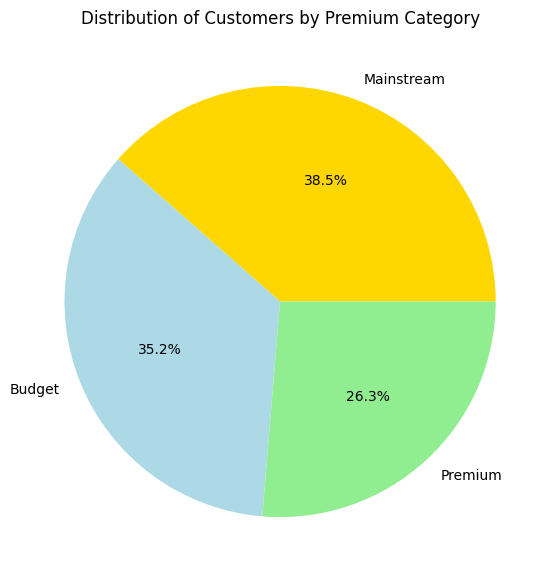

In [36]:
import matplotlib.pyplot as plt

# Count the number of customers in each category
customer_counts = merged_data["PREMIUM_CUSTOMER"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=["gold", "lightblue", "lightgreen"])
plt.title("Distribution of Customers by Premium Category")
plt.show()


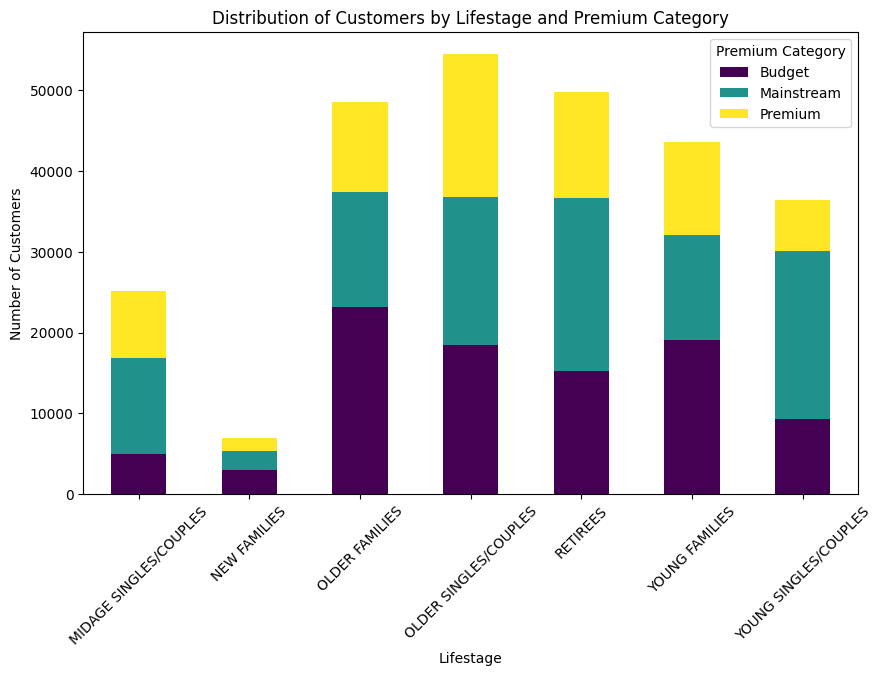

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each LIFESTAGE and PREMIUM_CUSTOMER category
lifestage_premium_counts = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().unstack()

# Plot a stacked bar chart
lifestage_premium_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Lifestage and Premium Category")
plt.xticks(rotation=45)
plt.legend(title="Premium Category")
plt.show()


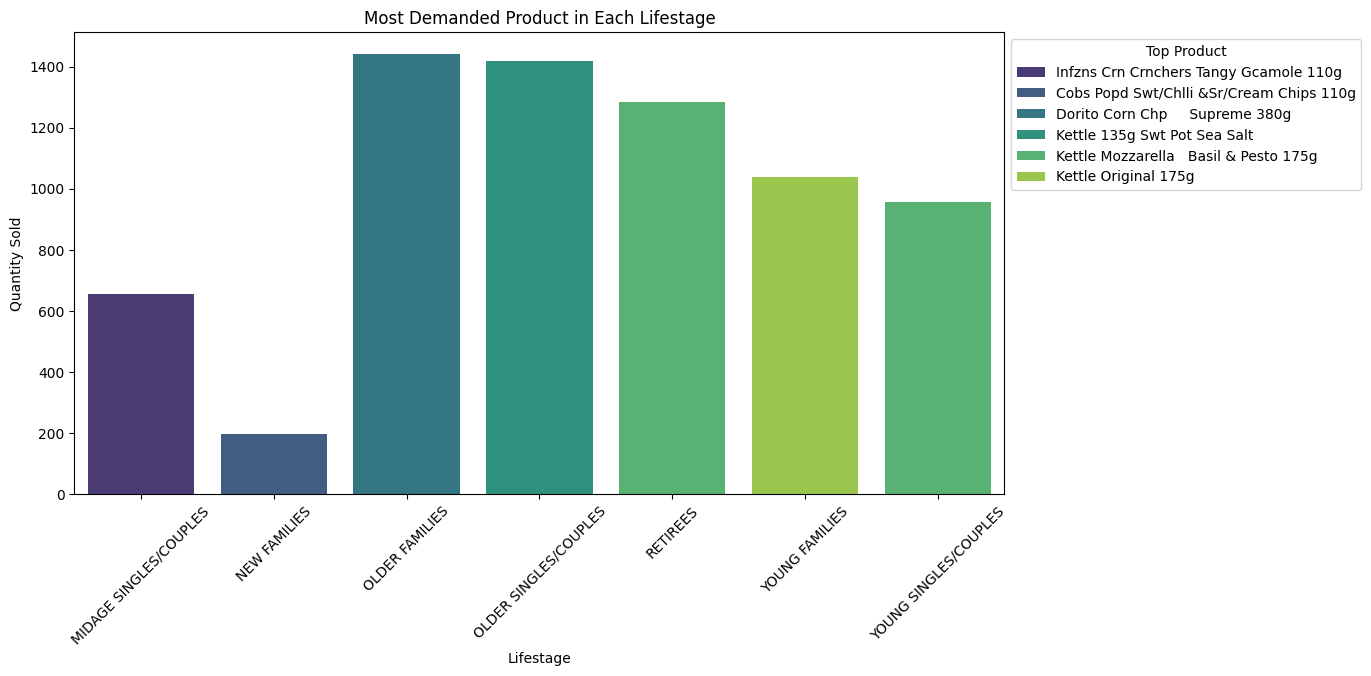

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by LIFESTAGE and PROD_NAME, then sum the quantity sold
lifestage_demand = merged_data.groupby(["LIFESTAGE", "PROD_NAME"])["PROD_QTY"].sum().reset_index()

# Find the top-selling product for each LIFESTAGE
top_products_per_lifestage = lifestage_demand.loc[lifestage_demand.groupby("LIFESTAGE")["PROD_QTY"].idxmax()]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_per_lifestage, x="LIFESTAGE", y="PROD_QTY", hue="PROD_NAME", palette="viridis")

plt.xlabel("Lifestage")
plt.ylabel("Quantity Sold")
plt.title("Most Demanded Product in Each Lifestage")
plt.xticks(rotation=45)
plt.legend(title="Top Product", bbox_to_anchor=(1, 1))
plt.show()


# Less Demand Products

In [39]:
# Group by product and sum both quantity sold and total sales
least_demanded_products = merged_data.groupby("PROD_NAME").agg({"PROD_QTY": "sum", "TOT_SALES": "sum"}).reset_index()

# Sort by quantity sold in ascending order to get the least demanded products
least_demanded_products = least_demanded_products.sort_values(by="PROD_QTY", ascending=True)

# Display the bottom 5 least demanded products with sales figures
print(least_demanded_products.head(5))


                                  PROD_NAME  PROD_QTY  TOT_SALES
21           French Fries Potato Chips 175g      2643     7929.0
105       WW Crinkle Cut      Original 175g      2666     4532.2
43   NCC Sour Cream &    Garden Chives 175g      2682     8046.0
112          Woolworths Medium   Salsa 300g      2700     4050.0
62                 RRD Pc Sea Salt     165g      2702     8106.0
